In [1]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import os
import numpy as np
from tensorflow.keras import layers
from IPython.display import Audio
import wave
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

2024-03-02 11:49:47.090685: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-02 11:49:47.090731: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-02 11:49:47.092391: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-02 11:49:47.101283: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-02 11:49:48.183596: W tensorflow/compiler/tf2

In [2]:
df = pd.read_csv("../data_processing/sep28k-mfcc.csv")

In [3]:
df = df[df['NaturalPause'] == 0]
df = df[df['Interjection'] == 0]
df = df[df['Prolongation'] == 0]
df = df[df['SoundRep'] == 0]
df = df[df['Block'] == 0]
df.head()

,Show,EpId,ClipId,Start,Stop,Unsure,PoorAudioQuality,Prolongation,Block,SoundRep,...,29,30,31,32,33,34,35,36,37,38
2,HeStutters,0,2,34809760,34857760,0,0,0,0,0,...,-3.249218,-3.218731,0.360520,-0.115838,1.723229,-1.460772,-1.430723,-1.429669,-0.178196,-3.046811
4,HeStutters,0,4,35721920,35769920,0,0,0,0,0,...,-2.057481,-3.225782,-1.561315,-3.723942,-2.249673,-3.513439,-2.097951,-1.940040,0.020210,-0.556461
6,HeStutters,0,6,37251200,37299200,0,0,0,0,0,...,-4.985494,-6.181957,-2.396787,-6.544606,-2.319257,-3.688410,-0.221778,-1.690031,0.664374,-0.303436
9,HeStutters,0,9,41417440,41465440,0,0,0,0,0,...,-4.798577,-6.274436,-4.889234,-5.795599,-4.400376,-4.176473,-0.957432,-3.210292,0.577023,1.042720
11,HeStutters,0,11,42928800,42976800,0,0,0,0,0,...,-3.798326,-6.705790,-1.544637,-6.356187,-0.987506,-3.107216,-1.422836,-3.615824,-1.171095,-1.937332


In [4]:
df = df.reset_index()
df.head()

,index,Show,EpId,ClipId,Start,Stop,Unsure,PoorAudioQuality,Prolongation,Block,...,29,30,31,32,33,34,35,36,37,38
0,2,HeStutters,0,2,34809760,34857760,0,0,0,0,...,-3.249218,-3.218731,0.360520,-0.115838,1.723229,-1.460772,-1.430723,-1.429669,-0.178196,-3.046811
1,4,HeStutters,0,4,35721920,35769920,0,0,0,0,...,-2.057481,-3.225782,-1.561315,-3.723942,-2.249673,-3.513439,-2.097951,-1.940040,0.020210,-0.556461
2,6,HeStutters,0,6,37251200,37299200,0,0,0,0,...,-4.985494,-6.181957,-2.396787,-6.544606,-2.319257,-3.688410,-0.221778,-1.690031,0.664374,-0.303436
3,9,HeStutters,0,9,41417440,41465440,0,0,0,0,...,-4.798577,-6.274436,-4.889234,-5.795599,-4.400376,-4.176473,-0.957432,-3.210292,0.577023,1.042720
4,11,HeStutters,0,11,42928800,42976800,0,0,0,0,...,-3.798326,-6.705790,-1.544637,-6.356187,-0.987506,-3.107216,-1.422836,-3.615824,-1.171095,-1.937332


In [5]:
df = df.drop(columns=['index'])
df.head()

,Show,EpId,ClipId,Start,Stop,Unsure,PoorAudioQuality,Prolongation,Block,SoundRep,...,29,30,31,32,33,34,35,36,37,38
0,HeStutters,0,2,34809760,34857760,0,0,0,0,0,...,-3.249218,-3.218731,0.360520,-0.115838,1.723229,-1.460772,-1.430723,-1.429669,-0.178196,-3.046811
1,HeStutters,0,4,35721920,35769920,0,0,0,0,0,...,-2.057481,-3.225782,-1.561315,-3.723942,-2.249673,-3.513439,-2.097951,-1.940040,0.020210,-0.556461
2,HeStutters,0,6,37251200,37299200,0,0,0,0,0,...,-4.985494,-6.181957,-2.396787,-6.544606,-2.319257,-3.688410,-0.221778,-1.690031,0.664374,-0.303436
3,HeStutters,0,9,41417440,41465440,0,0,0,0,0,...,-4.798577,-6.274436,-4.889234,-5.795599,-4.400376,-4.176473,-0.957432,-3.210292,0.577023,1.042720
4,HeStutters,0,11,42928800,42976800,0,0,0,0,0,...,-3.798326,-6.705790,-1.544637,-6.356187,-0.987506,-3.107216,-1.422836,-3.615824,-1.171095,-1.937332


In [6]:
df.to_csv("wordrep.csv",index=False)

In [7]:
import os

def list_files(directory):
    return [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

# Replace 'directory_path' with the path to your directory
directory_path = '/home/alien/Git/DATA/mel_spects_wordrep'
# names_list = list_files(directory_path)
names_list = pd.read_csv("wordrep.csv")['Name'].values.tolist()
# full_names_list = ["/home/alien/Git/DATA/mfcc_images/" + img + ".jpg" for img in names_list]
full_names_list = []
for img in names_list:
    corresponding_sound = df.loc[df['Name'] == img, 'WordRep'].values[0]
    if corresponding_sound == 0:
        full_names_list.append("/home/alien/Git/DATA/mel_spects_wordrep/" + img + "_fluent.jpg")
    if corresponding_sound >= 1:
        full_names_list.append("/home/alien/Git/DATA/mel_spects_wordrep/" + img + "_stutter.jpg")

print(full_names_list[-2])

/home/alien/Git/DATA/mel_spects_wordrep/WomenWhoStutter_109_33_fluent.jpg


In [8]:
def load_all(imagefile_list):
    data = []
    labels = []

    for imagefile in imagefile_list:
        print(imagefile)
        image = cv2.imread(imagefile)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        data.append(image)

        if "fluent" in imagefile:
            labels.append(0)
        else:
            labels.append(1)

    labels = np.array(labels)
    data = np.array(data)

    return data, labels

In [9]:
X, y = load_all(full_names_list)

/home/alien/Git/DATA/mel_spects_wordrep/HeStutters_0_2_fluent.jpg
/home/alien/Git/DATA/mel_spects_wordrep/HeStutters_0_4_fluent.jpg
/home/alien/Git/DATA/mel_spects_wordrep/HeStutters_0_6_fluent.jpg
/home/alien/Git/DATA/mel_spects_wordrep/HeStutters_0_9_fluent.jpg
/home/alien/Git/DATA/mel_spects_wordrep/HeStutters_0_11_fluent.jpg
/home/alien/Git/DATA/mel_spects_wordrep/HeStutters_0_12_fluent.jpg
/home/alien/Git/DATA/mel_spects_wordrep/HeStutters_0_15_fluent.jpg
/home/alien/Git/DATA/mel_spects_wordrep/HeStutters_0_16_fluent.jpg
/home/alien/Git/DATA/mel_spects_wordrep/HeStutters_0_20_fluent.jpg
/home/alien/Git/DATA/mel_spects_wordrep/HeStutters_0_22_fluent.jpg
/home/alien/Git/DATA/mel_spects_wordrep/HeStutters_0_24_fluent.jpg
/home/alien/Git/DATA/mel_spects_wordrep/HeStutters_0_26_fluent.jpg
/home/alien/Git/DATA/mel_spects_wordrep/HeStutters_0_29_fluent.jpg
/home/alien/Git/DATA/mel_spects_wordrep/HeStutters_0_32_fluent.jpg
/home/alien/Git/DATA/mel_spects_wordrep/HeStutters_0_34_fluent.jpg

In [10]:
print(X[0])
print(y[0])

[[[229  87  91]
  [203  68  83]
  [206  69  98]
  ...
  [ 10   0  30]
  [  5   2  22]
  [  1   5   7]]

 [[252 137 103]
  [249 134 108]
  [251 125 117]
  ...
  [ 45  22  80]
  [ 37  24  65]
  [  2   4  12]]

 [[241 144  84]
  [243 145  92]
  [245 131  93]
  ...
  [ 44  13  96]
  [ 40  21  79]
  [  5   1  19]]

 ...

 [[206  65 117]
  [201  62 108]
  [204  61 118]
  ...
  [ 52  16 106]
  [ 55  21 103]
  [ 22   4  63]]

 [[ 86  28  44]
  [ 93  33  48]
  [ 93  30  51]
  ...
  [ 22   7  48]
  [ 24  10  49]
  [ 10   3  32]]

 [[  0   0   2]
  [  0   0   2]
  [  0   0   2]
  ...
  [  0   0   2]
  [  0   0   2]
  [  0   0   2]]]
0


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=12)

In [12]:
print("x_train shape:", X_train.shape)
print("x_test shape:", X_test.shape)
print('y_train shape:', y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (1472, 224, 224, 3)
x_test shape: (631, 224, 224, 3)
y_train shape: (1472,)
y_test shape: (631,)


In [13]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

1472 631 1472 631


In [14]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 1192, 1: 280})
Counter({0: 506, 1: 125})


In [15]:
print(X_train)

[[[[  0   0   2]
   [  0   0   3]
   [  0   0   4]
   ...
   [ 35  11  51]
   [ 84  21 129]
   [ 87  23 120]]

  [[  0   0   4]
   [  0   0   4]
   [  0   0   4]
   ...
   [ 38  11  53]
   [ 84  20 129]
   [ 87  23 120]]

  [[  0   0   5]
   [  0   0   4]
   [  0   0   4]
   ...
   [ 41  12  57]
   [ 83  18 130]
   [ 88  24 121]]

  ...

  [[103  27 127]
   [102  25 130]
   [ 93  23 130]
   ...
   [161  46 121]
   [169  58 135]
   [128  34 125]]

  [[ 45  16  57]
   [ 45  15  59]
   [ 42  14  61]
   ...
   [ 65  23  50]
   [ 70  30  58]
   [ 52  18  52]]

  [[  0   0   2]
   [  0   0   2]
   [  0   0   2]
   ...
   [  0   0   2]
   [  0   0   2]
   [  0   0   2]]]


 [[[  0   0   2]
   [  0   0   2]
   [  0   0   2]
   ...
   [125  32 124]
   [111  30 136]
   [ 72  13 128]]

  [[  0   0   2]
   [  0   0   2]
   [  0   0   2]
   ...
   [144  47 134]
   [126  45 141]
   [ 73  18 116]]

  [[  0   0   2]
   [  0   0   2]
   [  0   0   2]
   ...
   [154  48 130]
   [135  52 137]
   [ 70  18

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, MultiHeadAttention
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, Flatten, Dense, Input, AveragePooling2D, Attention, Reshape, TimeDistributed, Bidirectional, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
vgg_model = tf.keras.models.load_model('./model_wordrep/')

2024-03-02 11:50:00.293699: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-02 11:50:00.315949: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-02 11:50:00.316297: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [18]:
vgg_model.summary

<bound method Model.summary of <keras.src.engine.functional.Functional object at 0x76f269f67d10>>

In [19]:
# Combine features
X_combined = np.concatenate((X_train, X_test), axis=0)
np.set_printoptions(threshold=np.inf)
# Combine labels
y_combined = np.concatenate((y_train, y_test), axis=0)
# predictions
vgg_pred = vgg_model.predict(X_combined, batch_size=1)
with open("temp.txt", "w") as file:
    # Write the variable's value to the file
    file.write(np.array2string(np.around(vgg_pred)))
  
vgg_pred = np.round(vgg_pred)

  # model evaluation
confusion = confusion_matrix(y_combined, vgg_pred)
print(classification_report(y_combined, vgg_pred))
print(confusion)

W0000 00:00:1709398205.517465   62521 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "GPU" vendor: "NVIDIA" model: "NVIDIA GeForce RTX 3080" frequency: 1710 num_cores: 68 environment { key: "architecture" value: "8.6" } environment { key: "cuda" value: "12020" } environment { key: "cudnn" value: "8904" } num_registers: 65536 l1_cache_size: 24576 l2_cache_size: 5242880 shared_memory_size_per_multiprocessor: 102400 memory_size: 7444168704 bandwidth: 760080000 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }
2024-03-02 11:50:05.644792: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-03-02 11:50:05.759774: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


2103/2103 [==============================] - 8s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1698
           1       0.97      0.94      0.95       405

    accuracy                           0.98      2103
   macro avg       0.98      0.96      0.97      2103
weighted avg       0.98      0.98      0.98      2103

[[1685   13]
 [  26  379]]


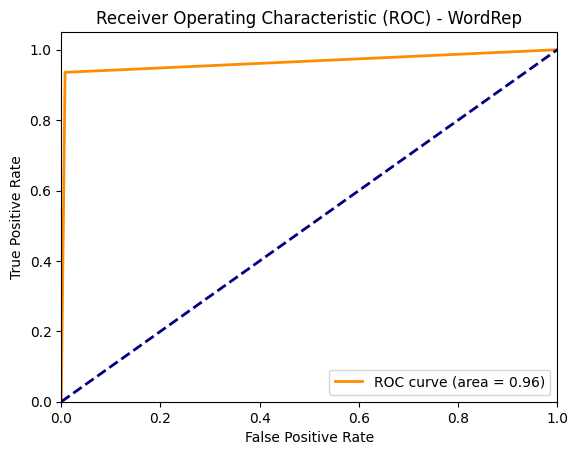

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming vgg_pred contains probabilities of belonging to class 1
fpr, tpr, thresholds = roc_curve(y_combined, vgg_pred)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - WordRep')
plt.legend(loc="lower right")
plt.show()